<a href="https://colab.research.google.com/github/trungnt13/uef_bay1_2018/blob/master/ex0_intro_bayes/BAY1_TUT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install seaborn

# Simulate the play of "craps" and "roulette"

In this tutorial, we will follow the concept of "craps" and "roulette" games as mentioned in the example of chapter **2.1.8** to generate simulation data, and understand the underlying distribution of the whole process


In [0]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn
import numpy as np
from scipy.stats import itemfreq
# fixed random seed for reproducibility
np.random.seed(5218)

In [0]:
# configurations of experiments
n_samples = 100
# prior of the game
p_crap = 0.5 # let call this p(c)
p_roulette = 1 - p_crap # let call this p(r)
# selected word which we hear
selected_word = 11

## "Craps" game

In craps gamblers bet a sum of two dice 
The dices are _i.i.d_ (i.e. independent and identically distributed)
The distribution of each casted dice is **Uniform** distribution, and the outcome is $[1, 6]$

In [47]:
# this will uniformly randomize an integer from [1, 7) or [1, 6]
dice1 = np.random.randint(1, 7, size=n_samples, dtype='int32')
dice2 = np.random.randint(1, 7, size=n_samples, dtype='int32')
craps = dice1 + dice2
print(craps)

[ 4 10  7  6 10  4  7  7 10  8  7  4  5  6  6  5  7 10  6  7  9  7  7  7
  6  7  7  9  8 11  6  5 11  8  4 11  9  3  7  7  8  9  9  9  7  5 10  4
  5  4  8  4  7  4  7  7 11 11  9  8 11  5  7  4 10  8  8  8  7  4 11  7
  6 10  4  3  8  5  7  5  6  8  6  5  5  8 10  6 11  9  4  8  9  5  4  7
 11  7  4 11]


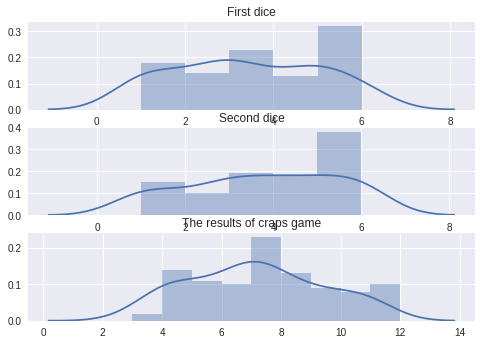

In [48]:
# visualizing the distribution of the dices and the craps game
plt.figure()

ax = plt.subplot(3, 1, 1)
seaborn.distplot(dice1, bins=np.arange(1, 7))
ax.set_title("First dice")

ax = plt.subplot(3, 1, 2)
seaborn.distplot(dice2, bins=np.arange(1, 7))
ax.set_title("Second dice")

ax = plt.subplot(3, 1, 3)
seaborn.distplot(craps, bins=np.arange(1, 13))
_ = ax.set_title("The results of craps game")

### Joint probability distribution of 2 dices
We are interested in the joint probability distribution of the 2 dices, since it represent the outcome of "craps"
In the following code, we create a table to represent all the possible values of the outcome from each dice

In [49]:
count = np.zeros(shape=(6, 6), dtype='int32')

for d1, d2 in zip(dice1, dice2):
  idx1 = d1 - 1
  idx2 = d2 - 1
  count[idx1, idx2] += 1
  count[idx2, idx1] += 1
# print the numerical count matrix
print(count)

[[ 0  2 11  6  3 11]
 [ 2  6  5  2  6  3]
 [11  5 10  6  6  4]
 [ 6  2  6  8  5  4]
 [ 3  6  6  5  8 10]
 [11  3  4  4 10  0]]


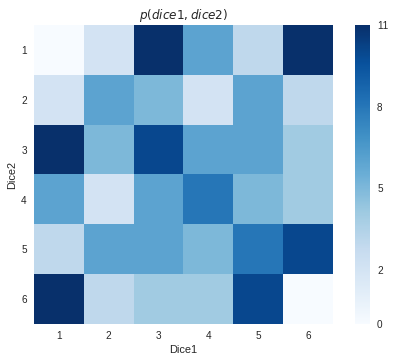

In [50]:
# ====== plot it for fun ====== #
plt.figure()
plt.imshow(count, cmap=plt.cm.Blues, interpolation='nearest')
cbar = plt.colorbar()
# adjust the colorbar a bit
cbar.set_ticks(np.linspace(0, np.max(count), num=5).astype("int32"))
plt.grid(False) # turn off the grid, so it look like a confusion matrix
plt.xticks(np.arange(6), np.arange(6) + 1)
plt.xlabel("Dice1")
plt.yticks(np.arange(6), np.arange(6) + 1)
plt.ylabel("Dice2")
_ = plt.title("$p(dice1,dice2)$")

## "Roulette" game
In roulette we have 38 equally likely outcomes

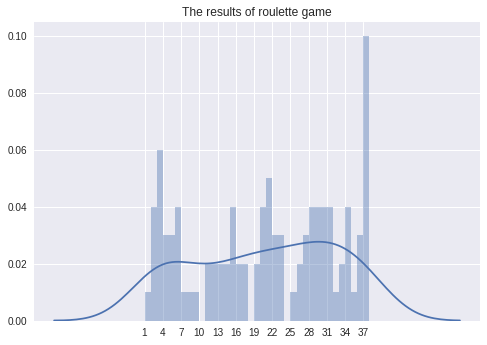

In [51]:
roulette = np.random.randint(1, 39, size=n_samples, dtype='int32')

plt.figure()
seaborn.distplot(roulette, bins=np.arange(1, 39))
ax = plt.gca()
ax.set_title("The results of roulette game")
_ = ax.set_xticks(np.arange(1, 39, 3, dtype='int32'))

## Modeling our situation

The games are results of **Bernoulli** distribution.

If "craps" was not played, then it was "roulette" played

$p_{crap} = 1 - p_{roulette}$

or 

$X_{crap} \sim Bernoulli(p=p_{crap})  $

The process can be done as follow:

1. We sampling $n$ samples from $Bernoulli(p=p_{crap})$, which results a series of 0 and 1
2. If the value is 1, it means the "craps" game was played, otherwise, "roulette" was played


In [52]:
# 1 mean "craps" played
# 0 mean it wasn't played, or "roulette" was played
craps_played = np.random.binomial(n=1, p=p_crap, size=n_samples)
print(craps_played)

[0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0]


In [53]:
# this is a logical function, can be translated into "English" as:
# "if craps was played, then selecte sample from craps distribution, otherwise, 
#  select sample from roulette distribution"
words = np.where(craps_played, craps, roulette)
# this return an array of mapping "shouted_word" -> "its_frequency"
words_distribution = itemfreq(words)
print(words_distribution)

[[ 2  1]
 [ 3  5]
 [ 4  7]
 [ 5  8]
 [ 6  9]
 [ 7 15]
 [ 8  8]
 [ 9  7]
 [10  2]
 [11  6]
 [15  2]
 [17  1]
 [19  1]
 [20  3]
 [21  2]
 [22  3]
 [26  1]
 [27  2]
 [28  2]
 [30  2]
 [31  2]
 [32  1]
 [33  1]
 [34  1]
 [35  1]
 [36  1]
 [37  3]
 [38  3]]


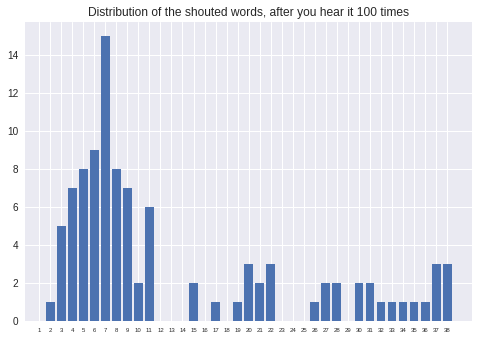

In [54]:
# ====== visualize the distribution of words ====== #
plt.figure()
plt.bar(words_distribution[:, 0], words_distribution[:, 1])
plt.title("Distribution of the shouted words, after you hear it %d times" % n_samples)
_ = plt.xticks(np.arange(1, 39), fontsize=6)

## How could we select all the samples from $p(craps|\text{selected_word})$

We could visually solve this by counting the number of shouted _selected word_ from both "craps" and "roulette" game, then calculate the probability of only the sample belong to "craps"

How many did you count?

Text(0.5,1,'Which game played, and what is the results, after 100 times')

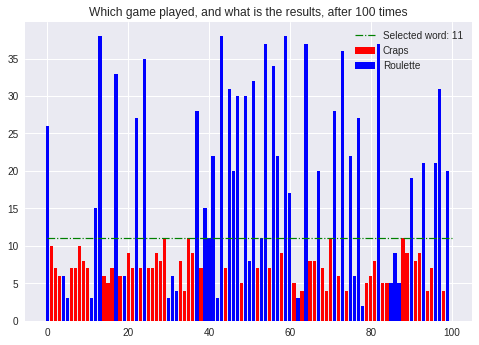

In [55]:
# ====== visualize who played and what results ====== #
# This is very heavy task so we only do it for 100 samples
plt.figure()
# all the "craps"
all_craps_words = [(idx, word)
                   for idx, (is_craps_played, word) in enumerate(zip(craps_played, words))
                   if is_craps_played]
all_craps_words = np.array(all_craps_words)

all_roulette_words = [(idx, word)
                      for idx, (is_craps_played, word) in enumerate(zip(craps_played, words))
                      if not is_craps_played]
all_roulette_words = np.array(all_roulette_words)

plt.bar(all_craps_words[:, 0], all_craps_words[:, 1], color='red', label="Craps")
plt.bar(all_roulette_words[:, 0], all_roulette_words[:, 1], color='blue', label="Roulette")
plt.hlines(y=selected_word, xmin=0, xmax=n_samples, linestyles='-.',
           color='green', linewidth=1.2,
           label="Selected word: %d" % selected_word)
plt.legend() # showing the legend
plt.title("Which game played, and what is the results, after %d times" % n_samples)

### Solve this programing-tically

Run the following code, how close is this value to the one _analytically_ calculated using Bayesian theorem ?

In [56]:
who = []
for is_craps_played, w in zip(craps_played, words):
  if w == selected_word: # i.e. given word = `selected_word`
    who.append(is_craps_played)

print("p(crap|%d)=" % selected_word, np.sum(who) / len(who))

p(crap|11)= 0.6666666666666666
